<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Skewness%2Ckurtosis%2CIQR(task_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew, kurtosis, iqr, zscore
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset1 = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset1.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

**Interquartile Range (IQR):**

The Interquartile Range (IQR) is a statistical measure that represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

First Quartile (Q1): This is the median of the lower half of the dataset, representing the 25th percentile.

Third Quartile (Q3): This is the median of the upper half of the dataset, representing the 75th percentile.

In [ ]:
sample1=dataset1['age']
outliers = []
def detect_outliers_iqr(dataset1):
    data = sorted(dataset1)
    q1 = np.percentile(dataset1, 25)
    q3 = np.percentile(dataset1, 75)
    print(q1, q3)
    IQR = q3-q1
    print(IQR)
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample1)
print("Outliers from IQR method: ", sample_outliers)

32.0 44.0
12.0
14.0 62.0
Outliers from IQR method:  [63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,

**Skewness:**


Skewness is a statistical measure that describes the asymmetry of a probability distribution.

In [ ]:
import pandas as pd
from scipy.stats import skew

# Load your dataset from a CSV file
file_path = "/content/drive/MyDrive/Bank Customer Churn Prediction.csv"  # Replace with the actual path to your CSV file
column_name = "age"  # Replace with the name of the column you want to analyze

# Read the CSV file and extract the specified column
df = pd.read_csv(file_path)
selected_column = df[column_name]

# Calculate skewness for the selected column
skewness = skew(selected_column)

# Display the skewness
print("Skewness:", skewness)


Skewness: 1.0111685586628079


 Kurtosis:

Kurtosis is a statistical measure that describes the shape, peakedness, or tails of a probability distribution.

In [ ]:
# Load the CSV file into a Pandas DataFrame
file_path = '/content/drive/MyDrive/Bank Customer Churn Prediction.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Choose a particular column for which you want to calculate kurtosis
selected_column = 'age'  # Replace with the name of the column you are interested in

# Check if the selected column exists in the DataFrame
if selected_column in data.columns:
    # Extract the selected column as a NumPy array
    selected_data = data[selected_column].values

    # Calculate Kurtosis for the selected column
    kurtosis_value = kurtosis(selected_data)

    print(f"Kurtosis for {selected_column}: {kurtosis_value}")
else:
    print(f"Column '{selected_column}' not found in the dataset.")


Kurtosis for age: 1.3940495456392599


**Detecting Outliers using the Z-scores**

->compute the Z-score using the formula (Xi-mean)/std.

->define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(dataset1):
    threshold = 3
    mean = np.mean(dataset1)
    std = np.std(dataset1)
    # print(mean, std)
    for i in dataset1:
        z_score = (i-mean)/std
        if (np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers# Driver code
sample = dataset1['age']
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [75, 73, 72, 79, 80, 75, 72, 82, 74, 71, 72, 74, 76, 71, 73, 77, 74, 74, 74, 74, 74, 72, 77, 74, 88, 71, 72, 71, 75, 73, 76, 85, 74, 76, 72, 71, 74, 72, 72, 84, 71, 74, 84, 77, 79, 76, 73, 73, 76, 72, 71, 80, 74, 76, 75, 77, 74, 71, 75, 78, 74, 71, 77, 79, 81, 79, 71, 72, 71, 72, 72, 78, 75, 71, 73, 71, 71, 76, 73, 75, 73, 71, 72, 73, 92, 75, 71, 77, 92, 72, 71, 76, 72, 77, 74, 72, 73, 77, 71, 72, 81, 76, 74, 71, 76, 72, 81, 73, 71, 75, 71, 71, 71, 73, 72, 71, 81, 73, 74, 83, 71, 78, 72, 74, 80, 72, 76, 71, 71, 78, 78, 77, 77]


BOX PLOT

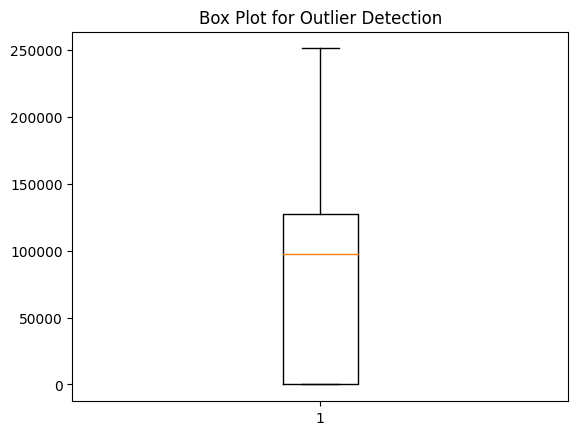

In [ ]:
def detect_outliers_boxplot(data):
    plt.boxplot(data)
    plt.title("Box Plot for Outlier Detection")
    plt.show()
dataset1 = '/content/drive/MyDrive/Bank Customer Churn Prediction.csv'
column_name = "balance"  # Replace with the name of the column you want to analyze
# Read the CSV file and extract the specified column
df = pd.read_csv(dataset1)
selected_column = df[column_name]
# Call the function to detect outliers using a box plot
detect_outliers_boxplot(selected_column)

**For Dataset2**

In [ ]:
dataset2.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

**Interquartile Range (IQR):**

In [ ]:
sample1=dataset2['Electric Range']
outliers = []
def detect_outliers_iqr(dataset2):
    data = sorted(dataset2)
    q1 = np.percentile(dataset2, 25)
    q3 = np.percentile(dataset2, 75)
    print(q1, q3)
    IQR = q3-q1
    print(IQR)
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample1)
print("Outliers from IQR method: ", sample_outliers)

0.0 84.0
84.0
-126.0 210.0
Outliers from IQR method:  [215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 

**Skewness:**

In [ ]:
# Load your dataset from a CSV file
file_path = "/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv"  # Replace with the actual path to your CSV file
column_name = "Electric Range"  # Replace with the name of the column you want to analyze

# Read the CSV file and extract the specified column
df = pd.read_csv(file_path)
selected_column = df[column_name]

# Calculate skewness for the selected column
skewness = skew(selected_column)

# Display the skewness
print("Skewness:", skewness)

Skewness: 1.3105706627813667


**Kurtosis**

In [ ]:
# Load the CSV file into a Pandas DataFrame
file_path = "/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Choose a particular column for which you want to calculate kurtosis
selected_column = 'Model Year'  # Replace with the name of the column you are interested in

# Check if the selected column exists in the DataFrame
if selected_column in data.columns:
    # Extract the selected column as a NumPy array
    selected_data = data[selected_column].values

    # Calculate Kurtosis for the selected column
    kurtosis_value = kurtosis(selected_data)

    print(f"Kurtosis for {selected_column}: {kurtosis_value}")
else:
    print(f"Column '{selected_column}' not found in the dataset.")


Kurtosis for Model Year: 0.4561366300817111


Detecting Outliers using the Z-scores


In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(dataset2):
    threshold = 3
    mean = np.mean(dataset2)
    std = np.std(dataset2)
    # print(mean, std)
    for i in dataset2:
        z_score = (i-mean)/std
        if (np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers# Driver code
sample = dataset2['Model Year']
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)


Outliers from Z-scores method:  [2011, 2011, 2011, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2008, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2010, 2000, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2008, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2008, 2011, 2011, 2011, 2011, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011]


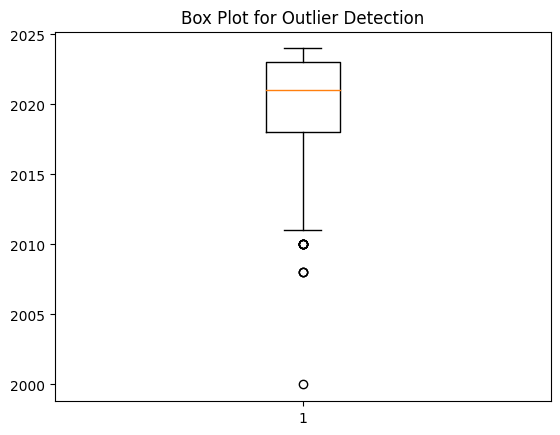

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers_boxplot(dataset2):
    plt.boxplot(dataset2)
    plt.title("Box Plot for Outlier Detection")
    plt.show()

# Load your dataset from a CSV file
file_path = "/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv"  # Replace with the actual path to your CSV file
column_name = "Model Year"  # Replace with the name of the column you want to analyze

# Read the CSV file and extract the specified column
df = pd.read_csv(file_path)
selected_column = df[column_name]

# Call the function to detect outliers using a box plot
detect_outliers_boxplot(selected_column)